# DSCI 552 | Homework 1 - Vertebral Column Data Set

| Key             | Value           |
| --------------- | --------------- |
| Submitted By    | Ruchit Bhardwaj |
| USC ID          | 1111-4177-99    |
| Github Username | ruch0401        |


This Biomedical data set was built by Dr. Henrique da Mota during a medical residence
period in Lyon, France. Each patient in the data set is represented in the data set
by six biomechanical attributes derived from the shape and orientation of the pelvis
and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle,
sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is
used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and
Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0
and AB=1.

## 1(a). Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column

In [1]:
# performing all imports and installing prettytable during execution
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import DistanceMetric
from sklearn.datasets import make_classification

!python -m pip install -U prettytable
from prettytable import PrettyTable

## 1(b). Pre-Processing and Exploratory data analysis

In [2]:
# statically defining NAMES and PATH constants
NAMES = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", 
         "sacral_slope", "pelvic_radius", "grade_of_spondylolisthesis", "label"]

PATH = '../../data/vertebral_column_data/column_2C.dat'

# reading data from csv and creating dataframe
df = pd.read_csv(PATH, header=None, delimiter=" ", names=NAMES)
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


### 1(b)-i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

Text(0.5, 1.1, 'Scatter Plot of all independent variables')

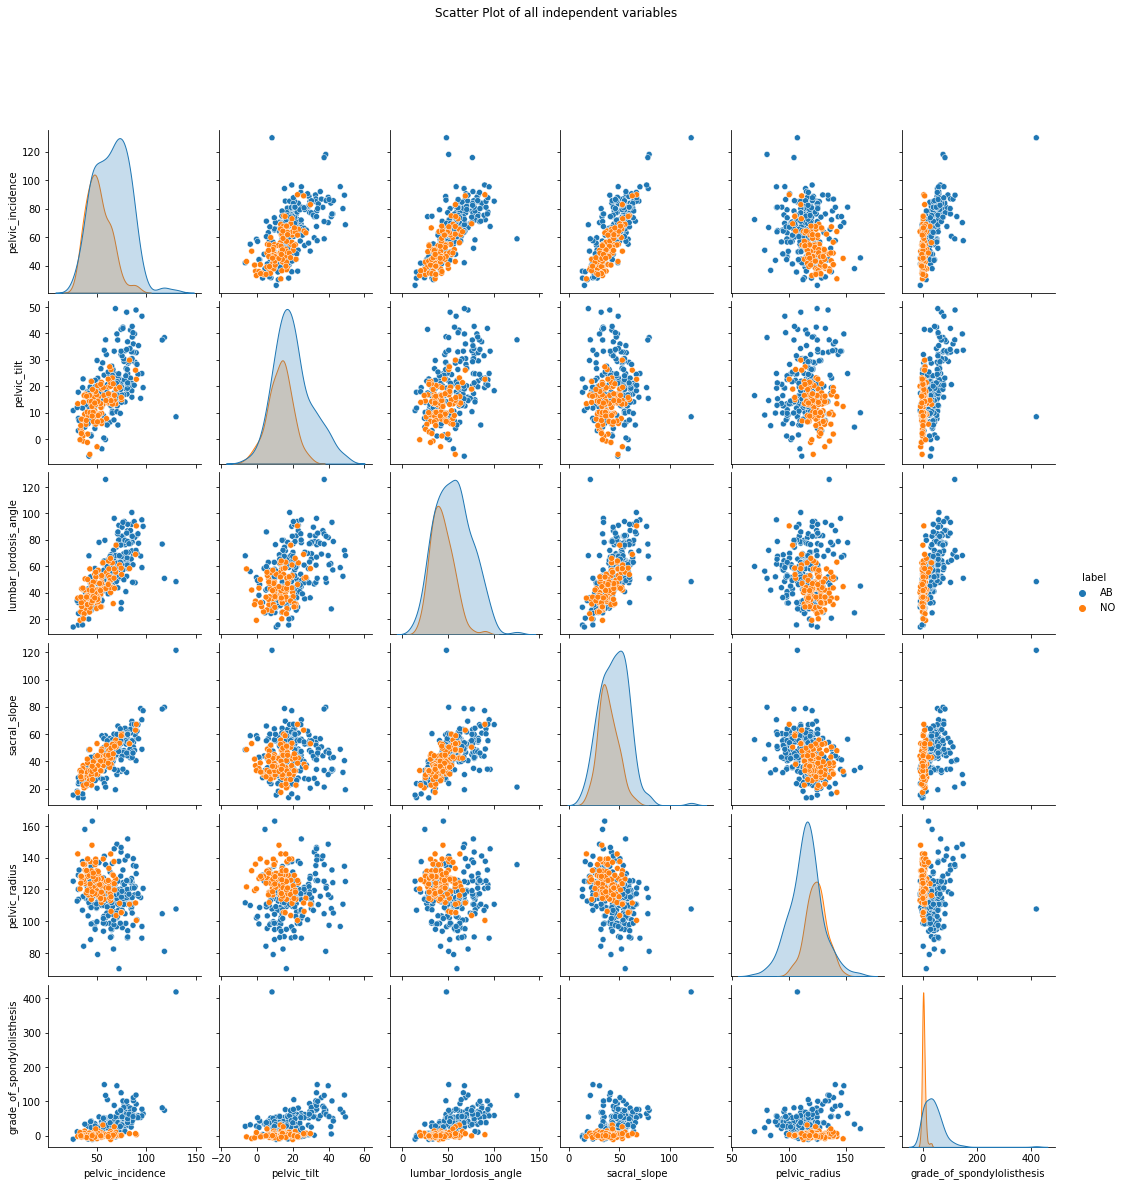

In [3]:
# initializing and defining scatterplot
fig = sns.pairplot(data = df, hue = "label")
fig.fig.suptitle("Scatter Plot of all independent variables", y=1.1)

In [4]:
# replacing textual classification with numeric values where AB = 1 and NO = 0
df.label.replace(['AB', 'NO'], [1, 0], inplace=True)
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


### 1(b)-ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

pelvic_incidence


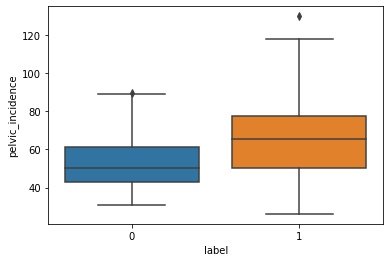

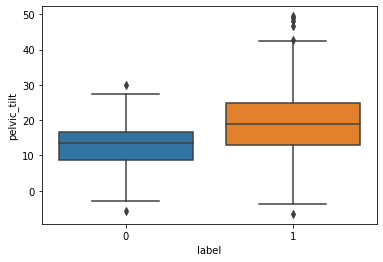

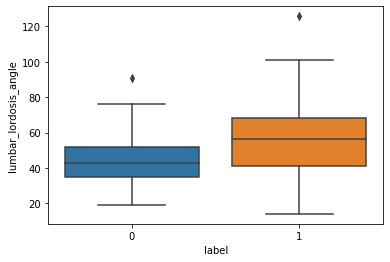

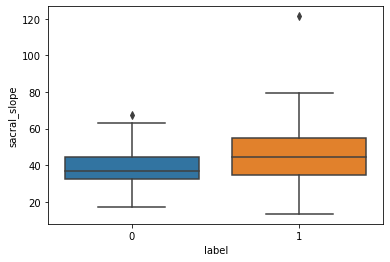

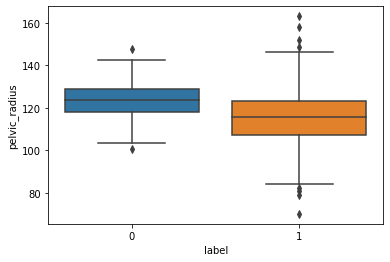

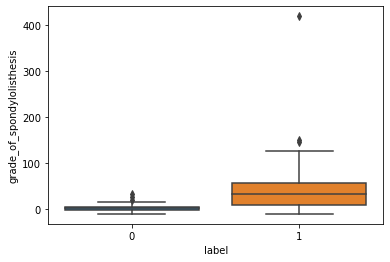

In [5]:
# initializing and defining scatterplot
print(df.columns[0])
for i in range(0, len(df.columns) - 1):
    sns.boxplot(data=df, x="label", y=df.columns[i])
    plt.show()

### 1(b)-iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [6]:
# bifurcating dataset into training and testing dataset
training_set = pd.concat([df[df["label"] == 0].iloc[0:70, :], df[df["label"] == 1].iloc[0:140, :]])
testing_set = pd.concat([df[df["label"] == 0].iloc[70:, :], df[df["label"] == 1].iloc[140:, :]])

print(f"Shape of training data: {training_set.shape}")
print(f"Shape of testing data: {testing_set.shape}") 

Shape of training data: (210, 7)
Shape of testing data: (100, 7)


## 1(c). Classification using KNN on Vertebral Column Data Set

### 1(c)-i. Write code for k-nearest neighbors with Euclidean metric (or use a software  package).

In [7]:
# separating training dataset into features and labels
training_features = training_set.iloc[:, 0:(len(df.columns) - 1)].values
training_labels = training_set.iloc[:, (len(df.columns) - 1)].values

# separating testing dataset into features and labels
testing_features = testing_set.iloc[:, 0:(len(df.columns) - 1)].values
testing_labels = testing_set.iloc[:, (len(df.columns) - 1)].values

# using sklearn's knn for training the model
classifier = KNeighborsClassifier(n_neighbors = 5, p=2, metric='euclidean')
classifier.fit(training_features, training_labels)

KNeighborsClassifier(metric='euclidean')

### 1(c)-ii.Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of $k$ for $k ∈ {208, 205, . . . , 7, 4, 1, }$ (in reverse order). You are welcome to use smaller increments of $k$. Which $k∗$ is the most suitable k among those values? 

### Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when $k = k∗$

##### Calculating error_rates for training and testing data | Creating graph plot for the same

In [8]:
training_error_list = []
testing_error_list = []

for k in range(208, 0, -3):
    classifier = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    classifier.fit(training_features, training_labels)
    
    # calculating accuracy score for given value of k for training and testing
    # error = 1 - accuracy
    training_error = 1 - accuracy_score(training_labels, classifier.predict(training_features))
    training_error_list.append(training_error)
    testing_error = 1 - accuracy_score(testing_labels, classifier.predict(testing_features))
    testing_error_list.append(testing_error)

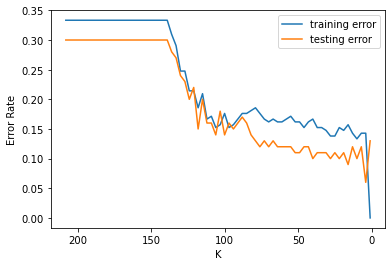

In [9]:
# for all values of k, plotting a graph for error_rate vs k_values using matplotlib
x = range(208, 0, -3)

plt.plot(x, training_error_list, label="training error")
plt.plot(x, testing_error_list, label="testing error")
plt.gca().invert_xaxis()
plt.gca().set_xlabel("K")
plt.gca().set_ylabel("Error Rate")
plt.gca().legend()
plt.show()

##### Most suitable $k$ among all k_values taken into consideration

The best value of k will be the one where the error is the least. We can see that as k decreases, the error also decreases. And since error and accuracy are inversely proportional to each other, it means that as error decreases, accuracy increases.  
Hence, for k = 1, error is tending to 0, which means that accuracy is tending to 1.
Hence k = 1 is the best.

##### Calculating confusion matrix, True Positive Rate, True Negative Rate, Precision, Recall and F1-score

In [10]:
def generate_pretty_table(headers, rows):
    temp = PrettyTable()
    temp.field_names = headers
    for row in rows:
        temp.add_row(row)
    return temp

In [11]:
classifier_with_k_1 = KNeighborsClassifier(n_neighbors = 1, metric='euclidean')
classifier_with_k_1.fit(training_features, training_labels)
predicted_testing_labels = classifier_with_k_1.predict(testing_features)
confusion = confusion_matrix(testing_labels, predicted_testing_labels)
tn, fn, tp, fp = confusion[0][0], confusion[1][0], confusion[1][1], confusion[0][1]

tpr =  tp / (tp + fn)
tnr = tn / (fp + tn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1score = 2 * (precision * recall) / (precision + recall)

print("Confusion Matrix")
cm_headers = ["Total Population (P + N)", "Positive", "Negative"]
cm_rows = [["Positive", tp, fn], ["Negative", fp, tn]]
print(generate_pretty_table(cm_headers, cm_rows))

isPrettyPrintEnabled = True

print("Calculation of Matrix")
if (isPrettyPrintEnabled): 
    metric_headers = ["Metric", "Value"]
    metric_rows = [["True Negative (TN)", tn],
                  ["False Negative (FN)", fn],
                  ["True Positive (TP)", tp],
                  ["False Positive (FP)", fp],
                  ["True Positive Rate (TPR)", tpr],
                  ["True Negative Rate (TNR)", tnr],
                  ["Precision", precision],
                  ["Recall", recall],
                  ["F1-score", f1score]]
    print(generate_pretty_table(metric_headers, metric_rows))
else:    
    new_line = "\n";
    print(f'''
    True Negative: {tn}
    False Negative: {fn}
    True Positive: {tp}
    False Positive: {fp}
    True Positive Rate: {tpr}
    True Negative Rate: {tnr}
    Precision: {precision}
    Recall: {recall}
    F-1 Score: {f1score}
    ''')



Confusion Matrix
+--------------------------+----------+----------+
| Total Population (P + N) | Positive | Negative |
+--------------------------+----------+----------+
|         Positive         |    67    |    3     |
|         Negative         |    10    |    20    |
+--------------------------+----------+----------+
Calculation of Matrix
+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
|    True Negative (TN)    |         20         |
|   False Negative (FN)    |         3          |
|    True Positive (TP)    |         67         |
|   False Positive (FP)    |         10         |
| True Positive Rate (TPR) | 0.9571428571428572 |
| True Negative Rate (TNR) | 0.6666666666666666 |
|        Precision         | 0.8701298701298701 |
|          Recall          | 0.9571428571428572 |
|         F1-score         | 0.9115646258503401 |
+--------------------------+--------------------+


### 1(c)-iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of $k$, against the size of training set, when the size of training set is $N ∈ {10, 20, 30, . . . , 210}$.  

### Note: for each $N$, select your training set by choosing the first $\lfloor (N/3) \rfloor$ rows of Class 0 and the first $ N − \lfloor N/3 \rfloor$ rows of Class 1 in the training set you created in $1(b)-iii$. Also, for each $N$, select the optimal $k$ from a set starting from $k = 1$, increasing by $5$. For example, if $N = 200$, the optimal $k$ is selected from ${1, 6, 11, . . . , 196}$.  This plot is called a $Learning \space Curve$.

In [12]:
best_k_list = []
best_error_list = []

for n in range(10, 211, 10):
    # creating truncated training sets
    truncated_train_set = pd.concat([training_set[training_set["label"] == 0].iloc[0: n // 3, :], 
                                    training_set[training_set["label"] == 1].iloc[0: n - n // 3, :]])

    # bifurcating the truncated training set into features and labels
    truncated_training_features = truncated_train_set.iloc[:, 0:(len(df.columns) - 1)].values
    truncated_training_labels = truncated_train_set.iloc[:, (len(df.columns) - 1)].values
    
    best_k = 0
    best_error = float("inf")
    # training the model using sklearn's knn for multiple values of k and keeping track of best_k on the basis of
    # least error values
    for k in range(1, n, 5):
        classifier = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
        classifier.fit(truncated_training_features, truncated_training_labels)
        predicted_test_labels_for_truncated_training_set = classifier.predict(testing_features)
        truncated_training_error = 1 - accuracy_score(testing_labels, predicted_test_labels_for_truncated_training_set)
        if (truncated_training_error < best_error):
            best_error = round(truncated_training_error, 2)
            best_k = k
    
    best_k_list.append(best_k)
    best_error_list.append(best_error)

curve_headers = ["Metric", "Value"]
curve_rows = [["Optimal K", min(best_k_list)],
             ["Error rate corresponding to optimal k", min(best_error_list)]]
print(generate_pretty_table(curve_headers, curve_rows))

+---------------------------------------+-------+
|                 Metric                | Value |
+---------------------------------------+-------+
|               Optimal K               |   1   |
| Error rate corresponding to optimal k |  0.08 |
+---------------------------------------+-------+


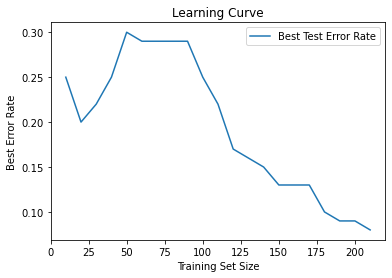

In [13]:
# plotting best_error_rate vs training set size
plt.plot(range(10, 211, 10), best_error_list, label="Best Test Error Rate")
plt.gca().set_title("Learning Curve")
plt.gca().set_xlabel("Training Set Size")
plt.gca().set_ylabel("Best Error Rate")
plt.gca().legend()
plt.show()

### 1(d) Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors (i.e., when $k = k^∗$) in a table. Use all of your training data and select the best $k$ when ${1, 6, 11, . . . , 196}$.

In [14]:
# defining a function to run sklearn's knn for various training_set, testing_set, k_values, metrics_used and weights
def test_knn_variations(training_set, testing_set, p_value, k_series, metric_used, weights='uniform'):
    
    # bifurcating training dataset into features and labels
    training_features = training_set.iloc[:, 0:(len(df.columns) - 1)].values
    training_labels = training_set.iloc[:, (len(df.columns) - 1)].values

    # bifurcating testing dataset into features and labels
    testing_features = testing_set.iloc[:, 0:(len(df.columns) - 1)].values
    testing_labels = testing_set.iloc[:, (len(df.columns) - 1)].values
    
    # if mahalanobis distance is used, options = {"VI": covI}, else None
    options = None
    if metric_used == "mahalanobis":
        options = {"VI": np.linalg.pinv(np.cov(training_features, rowvar=False))}
    else:
        options = None
    
    k_vs_error_dict = dict()
    
    for k in k_series:
        classifier = KNeighborsClassifier(n_neighbors=k, p=p_value, metric=metric_used, weights=weights, metric_params=options)
        classifier.fit(training_features, training_labels)
        testing_error = 1 - accuracy_score(testing_labels, classifier.predict(testing_features))
        k_vs_error_dict[k] = round(testing_error, 2)
        
    return k_vs_error_dict

def get_sorted_dict(dict):
    sorted_dict = {}
    sorted_keys = sorted(dict, key=dict.get)

    for w in sorted_keys:
        sorted_dict[w] = dict[w]

    return sorted_dict

def get_k_values_for_min_test_errors(test):
    sorted_dict = get_sorted_dict(test)
    anchor = sorted_dict[list(sorted_dict)[0]]
    ans = {}
    for key, value in sorted_dict.items():
        if sorted_dict[key] != anchor:
            break
        ans[key] = value
    return ans

### 1(d)-i(A): Minkowski Distance: which becomes Manhattan Distance with $p = 1.$

##### Manhattan distance analysis

In [15]:
# manhattan distance analysis
collect = test_knn_variations(training_set, testing_set, 1, range(1, 200, 5), "manhattan", 'uniform')
manhattan_ans = get_k_values_for_min_test_errors(collect)

manhattan_headers = ["Optimal K Values", "Corresponding Minimum Test Errors"]
manhattan_rows = []
for key, value in manhattan_ans.items():
    manhattan_rows.append([key, value])
print(generate_pretty_table(manhattan_headers, manhattan_rows))

+------------------+-----------------------------------+
| Optimal K Values | Corresponding Minimum Test Errors |
+------------------+-----------------------------------+
|        6         |                0.11               |
|        11        |                0.11               |
|        26        |                0.11               |
+------------------+-----------------------------------+


### 1(d)-i(B): Minkowski Distance: With $log_{10}(p) ∈ {0.1, 0.2, 0.3, . . . , 1}$. In this case, use the $k^∗$ you found for the Manhattan distance in $1(d)iA$. What is the best $log_{10}(p)$?

In [16]:
def p_analysis(training_set, testing_set, p_series, weighted = False):
    # bifurcating training dataset into features and labels
    training_features = training_set.iloc[:, 0:(len(df.columns) - 1)].values
    training_labels = training_set.iloc[:, (len(df.columns) - 1)].values

    # bifurcating testing dataset into features and labels
    testing_features = testing_set.iloc[:, 0:(len(df.columns) - 1)].values
    testing_labels = testing_set.iloc[:, (len(df.columns) - 1)].values
    
    test_error_list = []
    
    for p in p_series:
        classifier = KNeighborsClassifier(n_neighbors=6, p=p, metric="minkowski")
        classifier.fit(training_features, training_labels)
        testing_error = 1 - accuracy_score(testing_labels, classifier.predict(testing_features))
        test_error_list.append(testing_error)
        
    return {
        "P": p_series,
        "log10(p)": np.linspace(0.1, 1, 10),
        "test_error_list": test_error_list
    }

##### Minkowski distance p_analysis

In [17]:
# minkowski distance p_analysis
collect_p_analysis = p_analysis(training_set, testing_set, np.logspace(0.1, 1, 10))
p_analysis_df = pd.DataFrame(collect_p_analysis)
p_analysis_df

,P,log10(p),test_error_list
0,1.258925,0.1,0.09
1,1.584893,0.2,0.09
2,1.995262,0.3,0.08
3,2.511886,0.4,0.08
4,3.162278,0.5,0.08
5,3.981072,0.6,0.06
6,5.011872,0.7,0.07
7,6.309573,0.8,0.08
8,7.943282,0.9,0.09
9,10.000000,1.0,0.09


##### Best $log_{10}(p)$ analysis

In [18]:
min_test_error = p_analysis_df["test_error_list"].min()
p_analysis_df[p_analysis_df["test_error_list"] == min_test_error]

,P,log10(p),test_error_list
5,3.981072,0.6,0.06


### 1(d)-i(C): Minkowski Distance: Which becomes Chebyshev Distance with $p → ∞$

##### Chebyshev distance analysis

In [19]:
# chebyshev distance analysis
collect_chebyshev = test_knn_variations(training_set, testing_set, 1, range(1, 200, 5), "chebyshev", 'uniform')
chebyshev_ans = get_k_values_for_min_test_errors(collect_chebyshev)
chebyshev_headers = ["Optimal K Values", "Corresponding Minimum Test Errors"]
chebyshev_rows = []
for key, value in chebyshev_ans.items():
    chebyshev_rows.append([key, value])
print(generate_pretty_table(chebyshev_headers, chebyshev_rows))

+------------------+-----------------------------------+
| Optimal K Values | Corresponding Minimum Test Errors |
+------------------+-----------------------------------+
|        16        |                0.08               |
+------------------+-----------------------------------+


### 1(d)-ii: Mahalanobis Distance

In [20]:
# mahalanobis distance analysis
k_values = range(1, 200, 5)
p_value = 1
collect_mahalanobis = test_knn_variations(training_set, testing_set, p_value, k_values, "mahalanobis", "uniform")
mahalanobis_ans = get_k_values_for_min_test_errors(collect_mahalanobis)
mahalanobis_headers = ["Optimal K Values", "Corresponding Minimum Test Errors"]
mahalanobis_rows = []
for key, value in mahalanobis_ans.items():
    mahalanobis_rows.append([key, value])
print(generate_pretty_table(mahalanobis_headers, mahalanobis_rows))

+------------------+-----------------------------------+
| Optimal K Values | Corresponding Minimum Test Errors |
+------------------+-----------------------------------+
|        1         |                0.17               |
|        6         |                0.17               |
+------------------+-----------------------------------+


### 1(e). The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when $k ∈ {1, 6, 11, 16, . . . , 196}$.

In [23]:
def print_all_tables(metric, ans):
    print(f"Analysis for {metric}")
    headers = ["Optimal K Values", "Corresponding Minimum Test Errors"]
    rows = []
    for key, value in ans.items():
        rows.append([key, value])
    print(generate_pretty_table(headers, rows))

def perform_uniform_knn_analysis():
    metric_list = ["euclidean", "manhattan", "chebyshev", "mahalanobis"]
    for metric in metric_list:
        k_values = range(1, 200, 5)
        p_value = 1
        collect_metric = test_knn_variations(training_set, testing_set, p_value, k_values, metric, 'uniform')
        all_ans = get_k_values_for_min_test_errors(collect_metric)
        print_all_tables(metric, all_ans)

def perform_weighted_knn_analysis():
    metric_list = ["euclidean", "manhattan", "chebyshev"]
    for metric in metric_list:
        k_values = range(1, 200, 5)
        p_value = 1
        collect_metric = test_knn_variations(training_set, testing_set, p_value, k_values, metric, 'distance')
        all_ans = get_k_values_for_min_test_errors(collect_metric)
        print_all_tables(metric, all_ans)


#### Uniform KNN Analysis

In [26]:
perform_uniform_knn_analysis()

Analysis for euclidean
+------------------+-----------------------------------+
| Optimal K Values | Corresponding Minimum Test Errors |
+------------------+-----------------------------------+
|        6         |                0.08               |
+------------------+-----------------------------------+
Analysis for manhattan
+------------------+-----------------------------------+
| Optimal K Values | Corresponding Minimum Test Errors |
+------------------+-----------------------------------+
|        6         |                0.11               |
|        11        |                0.11               |
|        26        |                0.11               |
+------------------+-----------------------------------+
Analysis for chebyshev
+------------------+-----------------------------------+
| Optimal K Values | Corresponding Minimum Test Errors |
+------------------+-----------------------------------+
|        16        |                0.08               |
+------------------

In [27]:
perform_weighted_knn_analysis()

Analysis for euclidean
+------------------+-----------------------------------+
| Optimal K Values | Corresponding Minimum Test Errors |
+------------------+-----------------------------------+
|        6         |                0.1                |
+------------------+-----------------------------------+
Analysis for manhattan
+------------------+-----------------------------------+
| Optimal K Values | Corresponding Minimum Test Errors |
+------------------+-----------------------------------+
|        26        |                0.1                |
+------------------+-----------------------------------+
Analysis for chebyshev
+------------------+-----------------------------------+
| Optimal K Values | Corresponding Minimum Test Errors |
+------------------+-----------------------------------+
|        16        |                0.11               |
|        31        |                0.11               |
|        36        |                0.11               |
|        41        

### 1(f). What is the lowest training error rate you achieved in this homework?

The lowest training error rate that I achieved in this HW is 0.0 for k = 1.